In [1]:
import tensorflow as tf
import dataload as dataset
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import layers, models, losses

In [2]:
x_train, x_test, y_train, y_test = dataset.load()

Reading images from  c:\Users\Igor García\Desktop\IGOR GARCIA\UPM\4-CUARTO CURSO\PROYECTO DE FIN DE GRADO\ReconocimientoMatriculas\English/Img\
img001-0001 (1).jpg
img001-0001 (10).jpg
img001-0001 (100).jpg
img001-0001 (1000).jpg
img001-0001 (1001).jpg
img001-0001 (1002).jpg
img001-0001 (1003).jpg
img001-0001 (1004).jpg
img001-0001 (1005).jpg
img001-0001 (1006).jpg
img001-0001 (1007).jpg
img001-0001 (1008).jpg
img001-0001 (1009).jpg
img001-0001 (101).jpg
img001-0001 (1010).jpg
img001-0001 (1011).jpg
img001-0001 (1012).jpg
img001-0001 (1013).jpg
img001-0001 (1014).jpg
img001-0001 (1015).jpg
img001-0001 (1016).jpg
img001-0001 (1017).jpg
img001-0001 (1018).jpg
img001-0001 (1019).jpg
img001-0001 (102).jpg
img001-0001 (1020).jpg
img001-0001 (1021).jpg
img001-0001 (1022).jpg
img001-0001 (1023).jpg
img001-0001 (1024).jpg
img001-0001 (1025).jpg
img001-0001 (1026).jpg
img001-0001 (1027).jpg
img001-0001 (1028).jpg
img001-0001 (1029).jpg
img001-0001 (103).jpg
img001-0001 (1030).jpg
img001-0001 (1

In [3]:
#Normalizacion de los datos
x_train = tf.pad(x_train, [[0, 0], [0,0], [0,0], [0,0]])/255
x_test = tf.pad(x_test, [[0, 0], [0,0], [0,0], [0,0]])/255

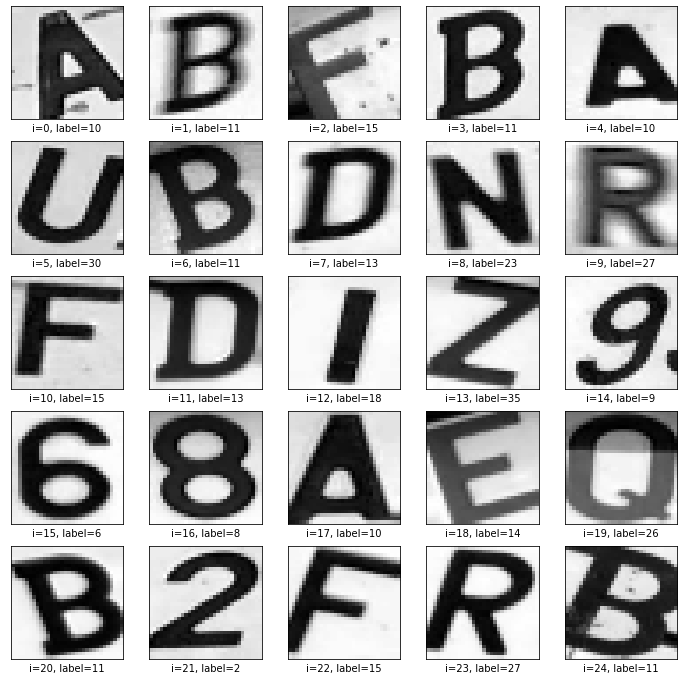

In [4]:
#Escogemos 25 imagenes de entrenamiento aleatorias
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(x_train[start_index+i], cmap='gray')
plt.show()

In [4]:
#Llevamos las ultimas 2000 imágenes a los datos de validación
x_val = x_train[-5000:,:,:,:] 
y_val = y_train[-5000:] 
x_train = x_train[:-5000,:,:,:] 
y_train = y_train[:-5000]

In [5]:
#Definición de la red
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(36, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dropout (Dropout)           (None, 1, 1, 120)         0

In [13]:
#Ejecución del entrenamiento
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [6]:
class_weight = {
    0: 2.0, 1: 2.0, 2: 2.0, 3: 2.0, 4: 2.0, 5: 3.0, 6: 2.0, 7: 2.0, 8: 2.0, 9: 3.0, #0-9 con el doble de peso, dar mas importancia a los numeros
    10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0,
    20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0,
    30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0}

In [7]:
#Ejecución del entrenamiento con pesos de clasificación
history = model.fit(x_train, y_train, class_weight= class_weight,batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
315/315 [==============================] - 7s 12ms/step - loss: 4.5792 - accuracy: 0.0513 - val_loss: 2.1959 - val_accuracy: 0.3560
Epoch 2/20
315/315 [==============================] - 3s 10ms/step - loss: 1.1029 - accuracy: 0.7542 - val_loss: 0.4987 - val_accuracy: 0.8608
Epoch 3/20
315/315 [==============================] - 3s 10ms/step - loss: 0.5516 - accuracy: 0.8801 - val_loss: 0.3137 - val_accuracy: 0.9102
Epoch 4/20
315/315 [==============================] - 3s 10ms/step - loss: 0.3759 - accuracy: 0.9172 - val_loss: 0.2160 - val_accuracy: 0.9360
Epoch 5/20
315/315 [==============================] - 3s 10ms/step - loss: 0.2782 - accuracy: 0.9385 - val_loss: 0.1627 - val_accuracy: 0.9532
Epoch 6/20
315/315 [==============================] - 3s 10ms/step - loss: 0.2122 - accuracy: 0.9534 - val_loss: 0.1203 - val_accuracy: 0.9696
Epoch 7/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1653 - accuracy: 0.9633 - val_loss: 0.1019 - val_accuracy: 0.9730

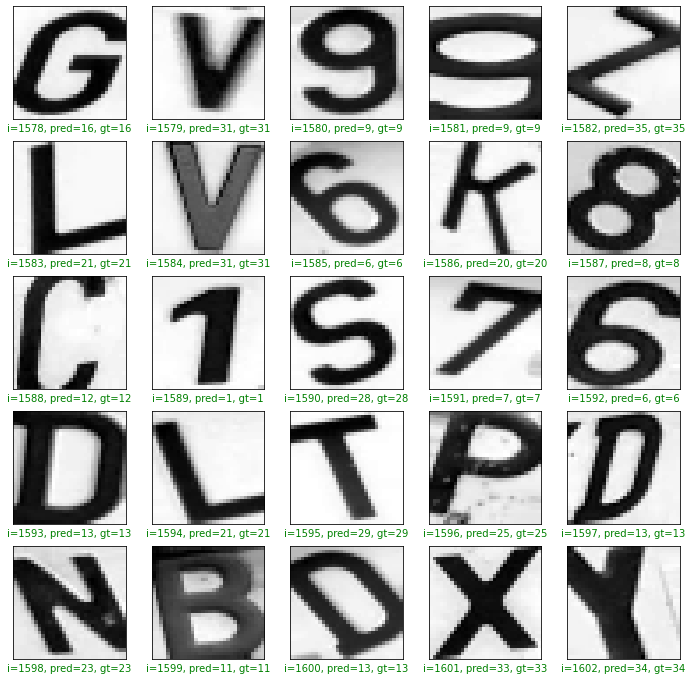

In [8]:
preds = model.predict(x_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 2745)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='gray')
plt.show()

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nValidation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

337/337 - 2s - loss: 0.0252 - accuracy: 0.9941 - 2s/epoch - 5ms/step

Validation accuracy: 0.9940547943115234

Validation loss: 0.025244349613785744


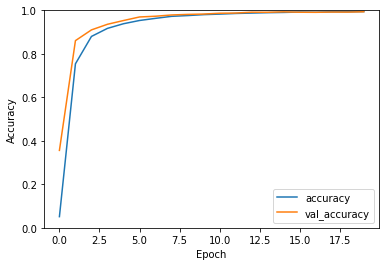

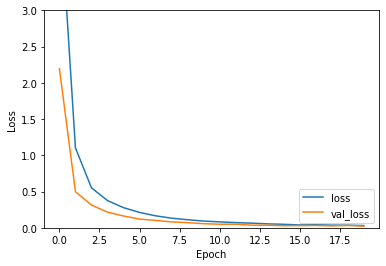

In [10]:
#Mostramos los resultados en un gráfico
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [11]:
#Guardar el modelo
model.save('/content/gdrive/My Drive/keras_model/lecturaConPesosDS3')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/lecturaConPesosDS3\assets
